In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from paths import RAW_DIR

In [3]:
data = pd.read_csv(RAW_DIR / 'heart_disease.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  GenHlth               253680 non-null  float64
 13  MentHlth              253680 non-null  float64
 14  PhysHlth              253680 non-null  float64
 15  

In [8]:
NUMERIC = ['BMI']
CATEGORICAL = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes',
    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth',
    'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Education', 'Income', 'Age']
TARGET = 'HeartDiseaseorAttack'

Analyzing the following plot we cannot arrived to any conclusions regarding the behavior of the studied variables and their relationship with the target variable. 

<AxesSubplot: xlabel='BMI', ylabel='Count'>

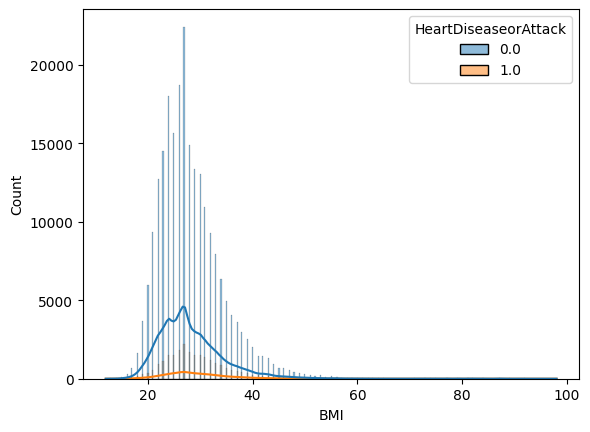

In [13]:
sns.histplot(x=data[NUMERIC[0]], hue=data[TARGET], kde=True)

From the following correlation map, we can see the following correlations between variables:

* `DiffWalk` - `PhysHlth`: Positive correlation
* `DiffWalk` - `GenHlth`: Positive correlation
* `PhysHlth` - `GenHlth`: Positive correlation
* `Education` - `Income`: Positive correlation. It suggest a direct lineal relation between the education and the income of a person.

From this results we assume that a bigger value in the variables `PhysHlth`, `MentHlth` and `GenHlth` suggests worse health condition.

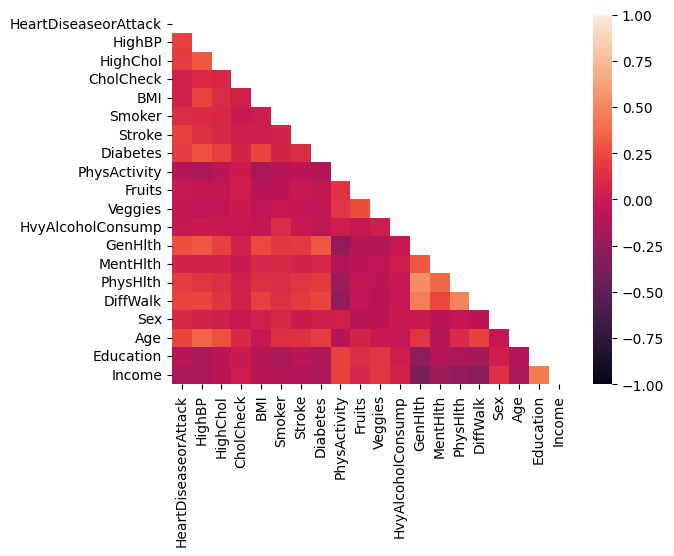

In [14]:
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
heatmap = sns.heatmap(
    data.corr(), mask=mask, vmin=-1, vmax=1)

Another exploratory analysis involves the categorical features and its relations with the target variable. While plotting this, we can see that there is a clearer relationship between the target variable and `HighBP`, `HighChol`, `CholCheck`, `Smoker`. Also, we can see how the individuals in the upper bins of the `Age` features are more prone to having heart attacks or disease than people on the lower bins.

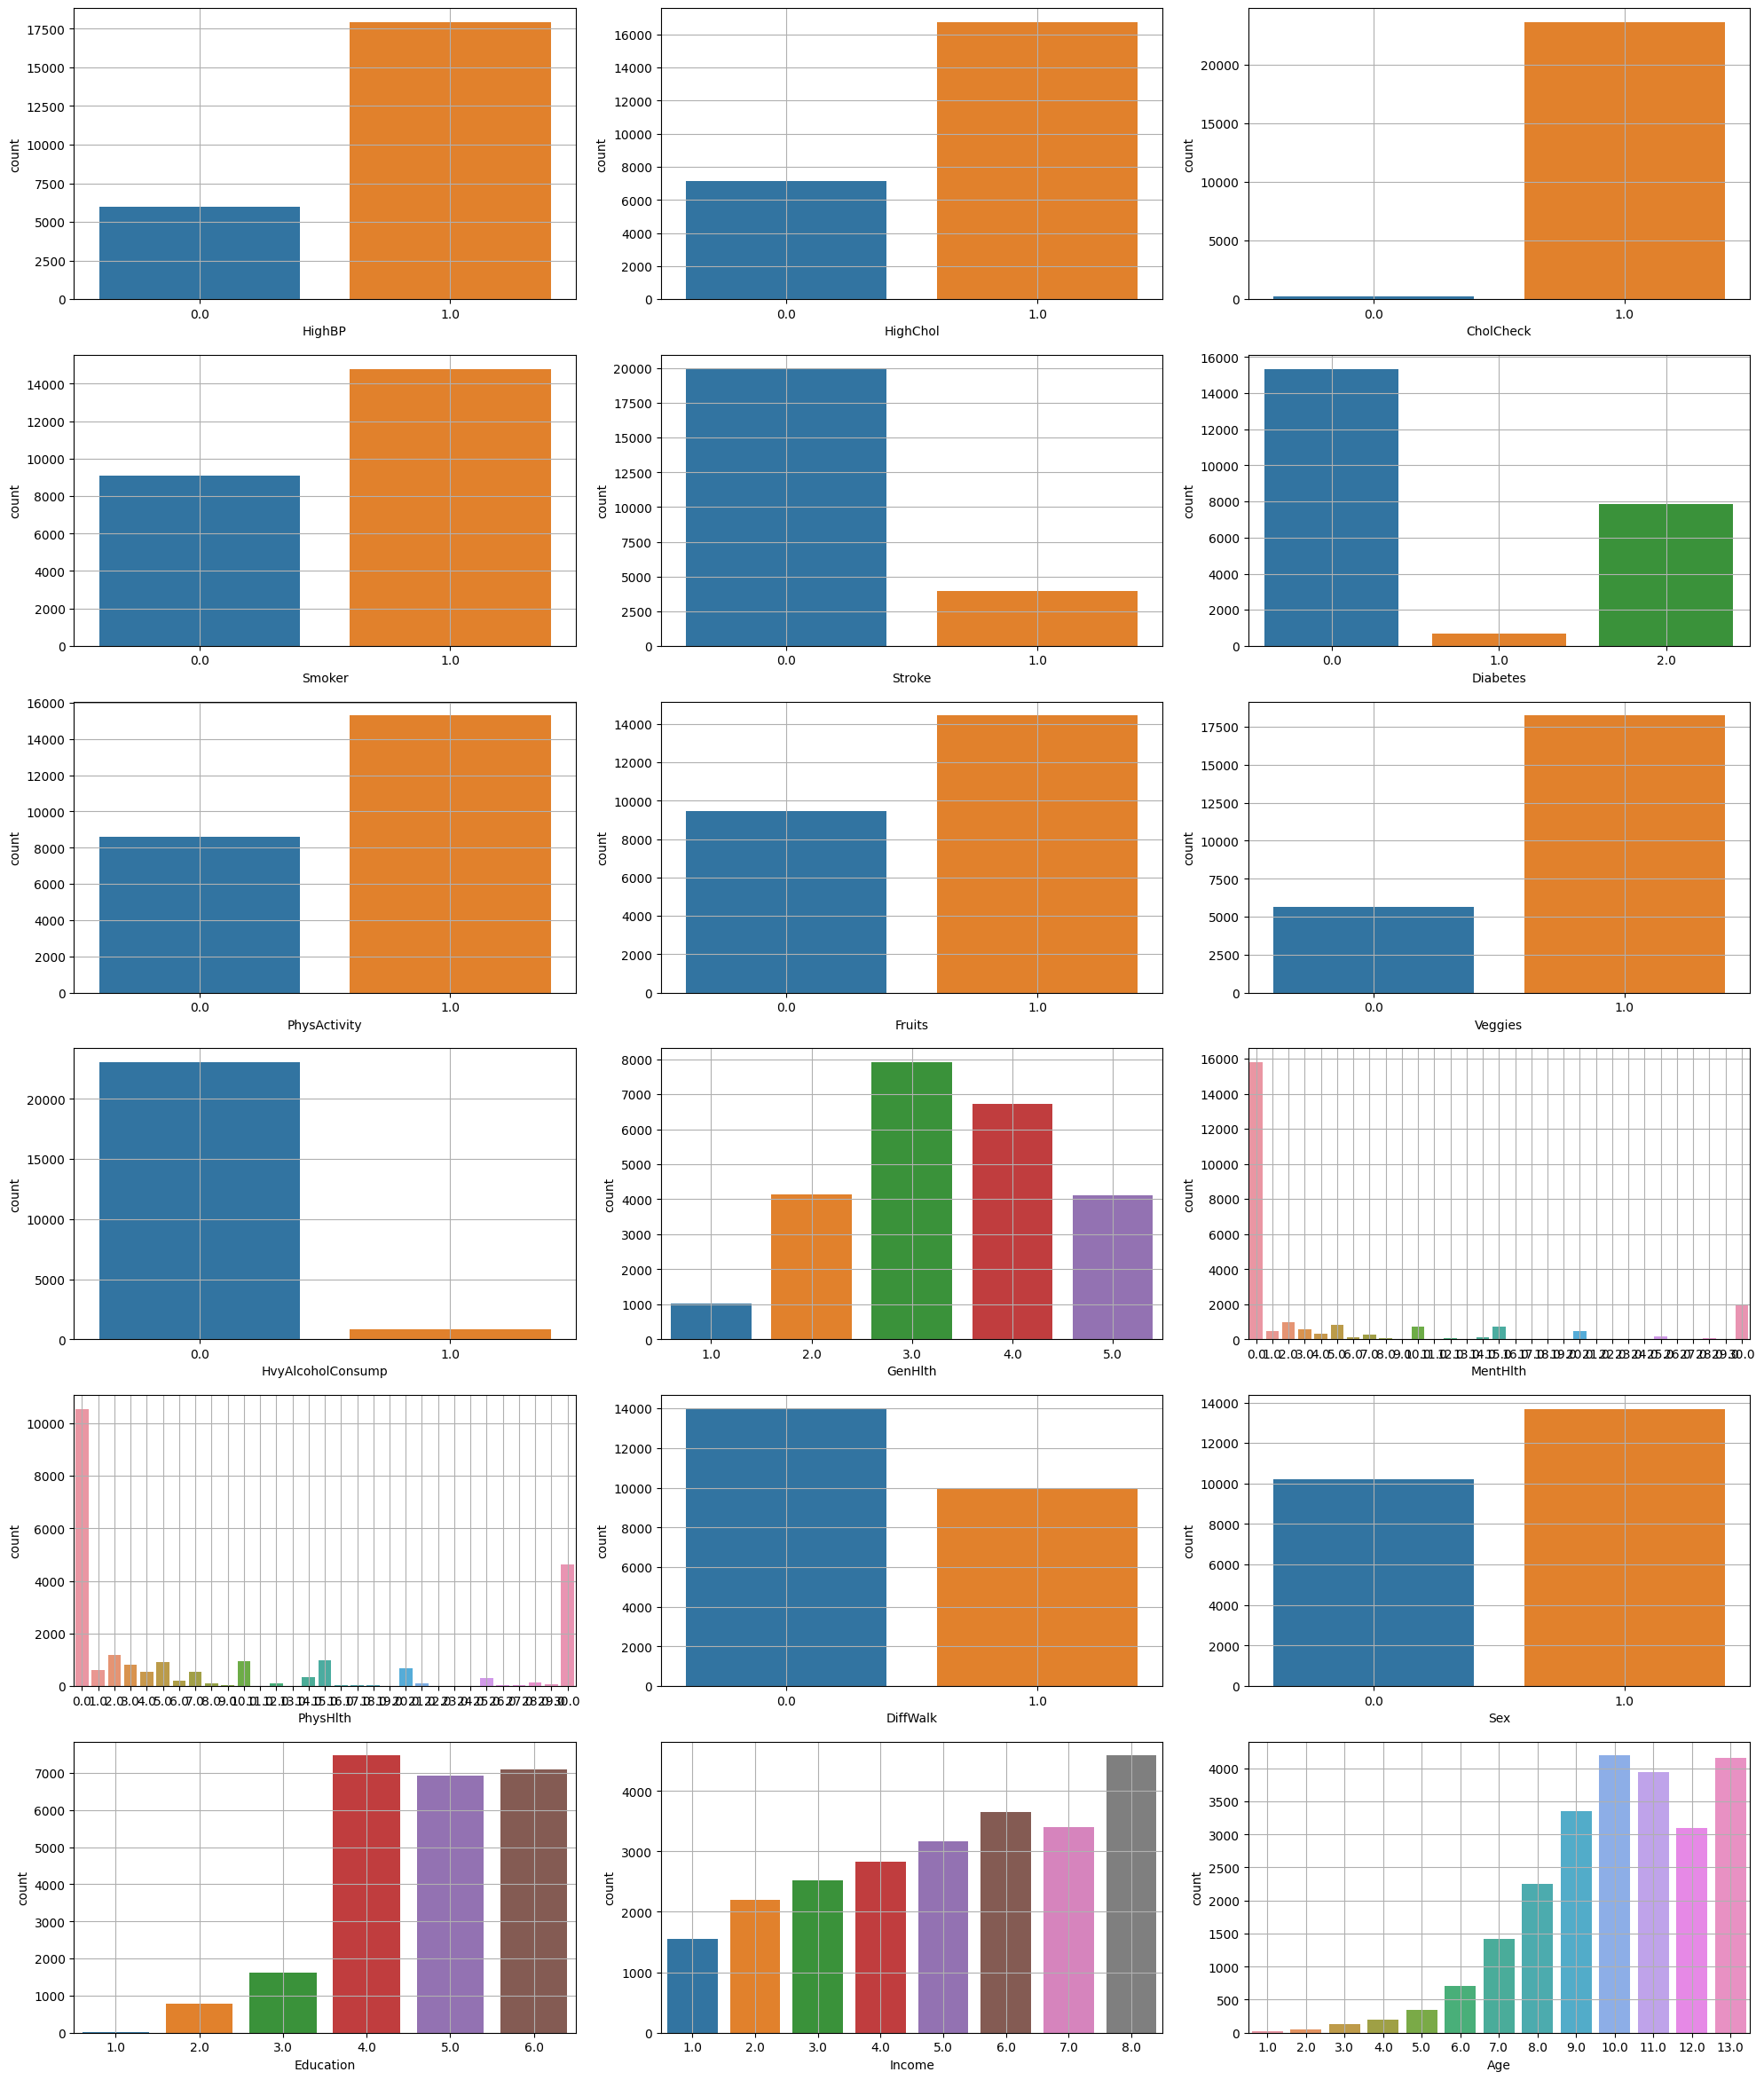

In [15]:
rows, columns = len(CATEGORICAL), 3

_ = plt.figure(figsize=(20,70))

for i, col in enumerate(CATEGORICAL):
    plt.subplot(rows, columns, i + 1)
    sns.countplot(
        x=data.loc[data[TARGET].eq(1), col],
    )
    plt.grid(True)

plt.tight_layout()
plt.show()